<a href="https://colab.research.google.com/github/kattrinazhou/Textasdata/blob/main/Textasdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 Dataset

The dataset is chosen from a website:
https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology

In [ ]:
import pandas as pd
import csv
import random


# import the data

train_dataset=pd.read_csv("https://raw.githubusercontent.com/kattrinazhou/Textasdata/main/Textasdata/test.csv")
test_dataset=pd.read_csv("https://raw.githubusercontent.com/kattrinazhou/Textasdata/main/Textasdata/train.csv")
result = pd.concat([train_dataset, test_dataset])
result.to_csv('combined.csv', index=False)

# dataset=pd.read_csv("https://github.com/kattrinazhou/Textasdata/blob/b92f3069aec825e3088ecca7477612938430ffe0/Textasdata/test.csv")


random.seed(42)
data=pd.read_csv("/content/combined.csv")
rows = len(data)
keep_percentage = 0.4
num_keep = int(rows * keep_percentage)
rows_keep = sorted(random.sample(range(rows), num_keep))
data_random = data.iloc[rows_keep].reset_index(drop=True)
data_random.to_csv('combined.csv', index=False)

In [ ]:
# type(data)
data_random.drop('Id', axis=1)

Comment      Topic
0     It's probably my perspective too because I liv...  Chemistry
1     I suppose you could engineer a retrovirus that...    Biology
2     Seeing as we are day animals I doubt we use th...    Biology
3     If you can't show and explain your data, you l...    Physics
4     Essentially, it is the change in volume betwee...  Chemistry
...                                                 ...        ...
4107  Are you wanting this to be a "peel off" mask? ...  Chemistry
4108  I make similar observations over the last week...    Biology
4109                                    You would know.    Biology
4110            Also use the correct number of sig figs  Chemistry
4111                          I would like to know too.    Biology

[4112 rows x 2 columns]

Tokenization

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3e2d898eebf4397032513a8e6fbf76a5e83fe9c673f08daeb1ab4aeea9b4f716
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import spacy
import nltk
import re
import urllib.parse
import emoji

# Download the required tokenizer and stopwords


# deal with url and emoji
data_list=[]
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
for text in data_random['Comment']:
  text = emoji.replace_emoji(text, replace='')
  text=url_pattern.sub(r'', text)
  data_list.append(text)

print(data_list)

nlp=spacy.load('en_core_web_sm')
def text_pipeline_spacy(texts):
    tokens = []
    for text in texts:
      doc = nlp(text)
      for t in doc:
          if not t.is_stop and not t.is_punct and not t.is_space and not t.is_currency and not t.like_url:
              tokens.append(t.lemma_.lower())
    return tokens

["It's probably my perspective too because I lived in London (250+ ppm) where it's way harder than anywhere in Australia (Adelaide is the hardest with 130+ ppm). By world standards, Brisbane and Adelaide are hard but it's not exactly unusual.\\n\\nI can definitely tell you that in London, it's very noticeable and there's limescale basically everywhere. Even my water bottle was building up a lot.", 'I suppose you could engineer a retrovirus that could do that, but it is far beyond our ability to create; and also, why would you want to? If you want to kill a large number of people, more reliably, in a short time, there are much easier ways.\\n\\nEdited for commas.', "Seeing as we are day animals I doubt we use the dark skin as camouflage. And I believe fair skin is more about not spending energy on melanine production since you don't really nees the extra sun protection. People with darker skin didn't get any advantage from it in northern lands, so fairer skin was slowly selected.", 'If 

In [ ]:

# deal with strange combination：'%20word%20word%20'
tokenlist_data=[]
tokenlist=[[sentence] for sentence in data_list]
for sentence in tokenlist:
  tokens=text_pipeline_spacy(sentence)
  tokenlist_data.append(tokens)
  

print(tokenlist_data)

[['probably', 'perspective', 'live', 'london', '250', '+', 'ppm', 'way', 'hard', 'australia', 'adelaide', 'hard', '130', '+', 'ppm', 'world', 'standard', 'brisbane', 'adelaide', 'hard', 'exactly', 'unusual.\\n\\ni', 'definitely', 'tell', 'london', 'noticeable', 'limescale', 'basically', 'water', 'bottle', 'build', 'lot'], ['suppose', 'engineer', 'retrovirus', 'far', 'ability', 'create', 'want', 'want', 'kill', 'large', 'number', 'people', 'reliably', 'short', 'time', 'easy', 'ways.\\n\\nedite', 'comma'], ['see', 'day', 'animal', 'doubt', 'use', 'dark', 'skin', 'camouflage', 'believe', 'fair', 'skin', 'spend', 'energy', 'melanine', 'production', 'nee', 'extra', 'sun', 'protection', 'people', 'dark', 'skin', 'advantage', 'northern', 'land', 'fair', 'skin', 'slowly', 'select'], ['explain', 'datum', 'lose', 'credibility', 'expect', 'society', 'believe', 'science', 'change', 'base', 'scientific', 'evidence', 'response', 'demand', 'proof', 'hard', 'trust', 'bro'], ['essentially', 'change', '

In [ ]:
for sublist in tokenlist_data:
    for i in range(len(sublist)):# 去掉字符串中的无关单词符号
        sublist[i] = sublist[i].strip().replace('.', '').replace(',', '').replace('\\n', '').replace('\\', '')
print(tokenlist_data)


[['probably', 'perspective', 'live', 'london', '250', '+', 'ppm', 'way', 'hard', 'australia', 'adelaide', 'hard', '130', '+', 'ppm', 'world', 'standard', 'brisbane', 'adelaide', 'hard', 'exactly', 'unusuali', 'definitely', 'tell', 'london', 'noticeable', 'limescale', 'basically', 'water', 'bottle', 'build', 'lot'], ['suppose', 'engineer', 'retrovirus', 'far', 'ability', 'create', 'want', 'want', 'kill', 'large', 'number', 'people', 'reliably', 'short', 'time', 'easy', 'waysedite', 'comma'], ['see', 'day', 'animal', 'doubt', 'use', 'dark', 'skin', 'camouflage', 'believe', 'fair', 'skin', 'spend', 'energy', 'melanine', 'production', 'nee', 'extra', 'sun', 'protection', 'people', 'dark', 'skin', 'advantage', 'northern', 'land', 'fair', 'skin', 'slowly', 'select'], ['explain', 'datum', 'lose', 'credibility', 'expect', 'society', 'believe', 'science', 'change', 'base', 'scientific', 'evidence', 'response', 'demand', 'proof', 'hard', 'trust', 'bro'], ['essentially', 'change', 'volume', 'tran

In [ ]:
t = [item for sublist in tokenlist_data for item in sublist]
print(t)

['probably', 'perspective', 'live', 'london', '250', '+', 'ppm', 'way', 'hard', 'australia', 'adelaide', 'hard', '130', '+', 'ppm', 'world', 'standard', 'brisbane', 'adelaide', 'hard', 'exactly', 'unusuali', 'definitely', 'tell', 'london', 'noticeable', 'limescale', 'basically', 'water', 'bottle', 'build', 'lot', 'suppose', 'engineer', 'retrovirus', 'far', 'ability', 'create', 'want', 'want', 'kill', 'large', 'number', 'people', 'reliably', 'short', 'time', 'easy', 'waysedite', 'comma', 'see', 'day', 'animal', 'doubt', 'use', 'dark', 'skin', 'camouflage', 'believe', 'fair', 'skin', 'spend', 'energy', 'melanine', 'production', 'nee', 'extra', 'sun', 'protection', 'people', 'dark', 'skin', 'advantage', 'northern', 'land', 'fair', 'skin', 'slowly', 'select', 'explain', 'datum', 'lose', 'credibility', 'expect', 'society', 'believe', 'science', 'change', 'base', 'scientific', 'evidence', 'response', 'demand', 'proof', 'hard', 'trust', 'bro', 'essentially', 'change', 'volume', 'transition', 

In [ ]:
tokens_list=[]
token=None

for word in t:
  decoded_sentence = urllib.parse.unquote(word)
  for symbol in ('\\n','?','\\','\\\\','.',';','#',':','*','/',')','(',']','[','&','-','!','_'):
    decoded_sentence=decoded_sentence.replace(symbol,' ')
    token = decoded_sentence.split()
  tokens_list.append(token)

tokens_corpus = [word for sublist in tokens_list for word in sublist]
print(tokens_corpus)

['probably', 'perspective', 'live', 'london', '250', '+', 'ppm', 'way', 'hard', 'australia', 'adelaide', 'hard', '130', '+', 'ppm', 'world', 'standard', 'brisbane', 'adelaide', 'hard', 'exactly', 'unusuali', 'definitely', 'tell', 'london', 'noticeable', 'limescale', 'basically', 'water', 'bottle', 'build', 'lot', 'suppose', 'engineer', 'retrovirus', 'far', 'ability', 'create', 'want', 'want', 'kill', 'large', 'number', 'people', 'reliably', 'short', 'time', 'easy', 'waysedite', 'comma', 'see', 'day', 'animal', 'doubt', 'use', 'dark', 'skin', 'camouflage', 'believe', 'fair', 'skin', 'spend', 'energy', 'melanine', 'production', 'nee', 'extra', 'sun', 'protection', 'people', 'dark', 'skin', 'advantage', 'northern', 'land', 'fair', 'skin', 'slowly', 'select', 'explain', 'datum', 'lose', 'credibility', 'expect', 'society', 'believe', 'science', 'change', 'base', 'scientific', 'evidence', 'response', 'demand', 'proof', 'hard', 'trust', 'bro', 'essentially', 'change', 'volume', 'transition', 

# Question 2 Clustering
This step is to perform k-means clustering over the data.



Firstly, implement k means, here are the steps:
- Step 0: Vectorise text
- Step 1: Pick k random "centroids"
- Step 2: Assign each vector to its closest centroid
- Step 3: Recalculate the centroids based on the closest vectors


##Step 0: Vectorise text


In [ ]:
data=data_random['Comment']

In [ ]:
data

0       It's probably my perspective too because I liv...
1       I suppose you could engineer a retrovirus that...
2       Seeing as we are day animals I doubt we use th...
3       If you can't show and explain your data, you l...
4       Essentially, it is the change in volume betwee...
                              ...                        
4107    Are you wanting this to be a "peel off" mask? ...
4108    I make similar observations over the last week...
4109                                      You would know.
4110              Also use the correct number of sig figs
4111                            I would like to know too.
Name: Comment, Length: 4112, dtype: object

In [ ]:
data.shape
# data_random.shape

(4112,)

### tfidf_vectorize_with_sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_vectorize_with_sklearn(text_corpus):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(text_corpus)
  return X

tfidf_vectorize_with_sklearn(data)

<4112x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 107738 stored elements in Compressed Sparse Row format>

In [ ]:
sparse_matrix=tfidf_vectorize_with_sklearn(data)
print(sparse_matrix)

  (0, 7075)	0.08881343308887013
  (0, 12855)	0.07629517279873345
  (0, 1904)	0.13269597127483718
  (0, 13201)	0.06886929975683624
  (0, 1755)	0.12433038262246861
  (0, 13220)	0.09052189113953214
  (0, 4387)	0.08230527122283636
  (0, 4403)	0.14699703953486282
  (0, 1418)	0.11245942340715444
  (0, 6952)	0.15536262818723134
  (0, 12227)	0.06751176717086886
  (0, 8360)	0.1637282168395999
  (0, 13028)	0.07933951782534761
  (0, 12198)	0.04510627931867576
  (0, 13544)	0.044127816226001905
  (0, 12109)	0.10588906046820837
  (0, 3360)	0.11379098735500735
  (0, 2022)	0.061334408119331135
  (0, 8167)	0.09254779690437241
  (0, 12850)	0.1637282168395999
  (0, 4415)	0.1221565760073759
  (0, 8344)	0.05602141648046452
  (0, 1943)	0.05385318685696088
  (0, 5565)	0.10751447386288163
  (0, 1130)	0.05520149083028234
  :	:
  (4108, 4226)	0.11643434941166211
  (4108, 4944)	0.06402228099106955
  (4108, 8655)	0.10590022637311125
  (4108, 12381)	0.09616408663864265
  (4108, 1130)	0.06687221540856993
  (4108, 9

In [ ]:
print(ksize_centorids)

  (205, 11330)	0.13781879384805704
  (2385, 1186)	0.10601451683648337
  (2680, 949)	0.04343561836396856
  (3197, 5602)	0.08470331731375717
  (3603, 9039)	0.27937315863503054


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
tokens=vectorizer.get_feature_names_out()

In [ ]:
print(len(tokens))

13599


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
# tokens = vectorizer.get_feature_names_out()
# index = 0
# print(tokens[2053][3870])

doc = X.getrow(2054) # 获取第2055个文档的向量
word_id = 7120
word_name = vectorizer.get_feature_names_out()[word_id] # 获取词汇的名称
doc_data = doc.toarray()[0] # 获取向量的值
word_value = doc_data[word_id] # 获取该词汇的TF-IDF值
raw_doc = X[2054] # 获取原始文本行
print(word_name)

research


##Step 1: Pick k random "centroids"

In [ ]:
data.shape[0]

4112

In [ ]:
print(sparse_matrix[2619])

  (0, 4794)	0.40010146439040023
  (0, 11627)	0.30368117572865516
  (0, 4792)	0.3491606171112085
  (0, 7647)	0.3679613681698185
  (0, 8339)	0.33582127194923683
  (0, 13158)	0.2933343757828668
  (0, 12844)	0.25178424597047194
  (0, 8771)	0.13974539736433095
  (0, 6589)	0.14244047464219778
  (0, 7175)	0.18656728717533347
  (0, 13549)	0.2958933185108636
  (0, 5239)	0.165799557200132
  (0, 8655)	0.0982314786880452
  (0, 12381)	0.08920037993042142
  (0, 13544)	0.09917246975683643
  (0, 6097)	0.10517837644136757


In [ ]:
import numpy as np

def centorids_initialize(k,data):
  centorids_list=[]
  row_index=[]
  centorids = np.random.choice(data.shape[0], k, replace=False)#get random point index

  for index in centorids:
    centorids_list.append(data[index])
    row_index.append(index)
  return centorids_list

centorid_list=centorids_initialize(5,sparse_matrix)



[ 374 2430 1545 1167 2594]
[<1x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>, <1x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>, <1x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>, <1x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>, <1x13599 sparse matrix of type '<class 'numpy.float64'>'
	with 218 stored elements in Compressed Sparse Row format>]


In [ ]:
print(centorid_list[1])

[1928, 408, 3152, 2138, 725]


In [ ]:
sparse_matrix[(1237, 485)]

0.5332290632738247

##Step 2: Assign each vector to its closest centroid

In [ ]:
# assign each vector to  closet centorids
import math
import scipy.sparse as sparse
from sklearn.metrics.pairwise import cosine_similarity
def assign_vector(k,data,clusters):
  # create k empty list inside one list
  centorids_list=[]
  index_list=[]
  for i in range(k):
    centorids_list.append([])
  for j in range(k):
    index_list.append([])

  for index in range(data.shape[0]):
    similarities=[]
    for centorid in clusters: # clusters have k centorid
      float_value= cosine_similarity(centorid, data[index]) #calculate similarity between data[index] and centorid
      similarities.append(float_value)#similarity list, size = k
    
    most_similar_index=np.argmax(similarities)#find maximum similarities//

    for i in range(k):
      if (most_similar_index==i):
        centorids_list[i].append(data[index])
        index_list[i].append(index)
 
  return centorids_list,index_list


assign_vector(5,sparse_matrix,centorids_initialize(5,sparse_matrix))



[1246 2996 2250  781 2716]


([[<1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 79 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 38 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 30 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 71 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 43 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 27 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 92 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matrix of type '<class 'numpy.float64'>'
   	with 98 stored elements in Compressed Sparse Row format>,
   <1x13599 sparse matri

##Step 3: Recalculate the centroids based on the closest 

In [ ]:
def recal_centroids(k, data, clusters):
  new_centroids=[]
  ksize_clusters=assign_vector(k,data,clusters)[0]
  index_set=assign_vector(k,data,clusters)[1]
  for cluster in ksize_clusters:
    sparse_matrix_array = np.array([m.toarray() for m in cluster])
    mean_array = np.mean(sparse_matrix_array, axis=0)
    mean_matrix = csr_matrix(mean_array)
    new_centroids.append(mean_matrix)
  return new_centroids

clusters = centorids_initialize(5, sparse_matrix)
new_centorids=recal_centroids(5, sparse_matrix, clusters)


[2928 1024 2153 1303 1150]
1375
52
310
2332
43
1375
52
310
2332
43
aduiahdihsid
1022
84
396
2539
71
1022


## Repeat Steps 2 and 3 until the model converges

In [ ]:
def kmeans(data,k,iterations=10):
  centroids = centorids_initialize(k,data)


  for i in range(iterations):
    cluster_list = assign_vector(5,sparse_matrix,centroids)
    rows_index = cluster_list[1]
    new_centroids = recal_centroids(k,data,centroids)
    if np.array_equal(centroids, new_centroids):

      break
    centroids = new_centroids
  return  cluster_list,centroids,rows_index

kmeans_data = kmeans(sparse_matrix, 5)


[2834 3073 1819 1817  879]


In [ ]:
print(kmeans_data[2])

[[171, 570, 631, 633, 645, 656, 661, 663, 670, 681, 748, 763, 788, 791, 811, 825, 847, 863, 881, 888, 891, 911, 913, 973, 976, 979, 982, 994, 1008, 1012, 1019, 1028, 1037, 1038, 1045, 1058, 1059, 1063, 1067, 1071, 1074, 1096, 1139, 1140, 1145, 1150, 1162, 1163, 1169, 1171, 1178, 1197, 1210, 1215, 1223, 1226, 1283, 1306, 1307, 1321, 1325, 1328, 1331, 1334, 1345, 1348, 1377, 1379, 1381, 1387, 1426, 1434, 1460, 1464, 1473, 1510, 1541, 1547, 1562, 1568, 1580, 1581, 1585, 1601, 1604, 1612, 1622, 1634, 1641, 1648, 1660, 1678, 1690, 1693, 1698, 1699, 1720, 1743, 1749, 1790, 1804, 1826, 1835, 1837, 1839, 1841, 1865, 1867, 1886, 1895, 1916, 1919, 1925, 1944, 1978, 1995, 2004, 2008, 2010, 2029, 2034, 2037, 2043, 2051, 2052, 2062, 2068, 2080, 2086, 2092, 2135, 2166, 2175, 2194, 2231, 2241, 2247, 2249, 2256, 2257, 2268, 2280, 2294, 2295, 2309, 2310, 2348, 2365, 2372, 2391, 2395, 2396, 2408, 2411, 2422, 2423, 2434, 2436, 2440, 2444, 2448, 2462, 2471, 2473, 2507, 2527, 2540, 2543, 2548, 2554, 2555, 

##top 5 token for each cluster

In [ ]:
# top 5 token for each cluster
clusters=kmeans_data[0][0]

for cluster in clusters:
    dense_matrices = [matrix.toarray() for matrix in cluster]
    token_counts = {}
    for matrix in dense_matrices:
        for i in range(len(matrix[0])):
            vectorizer = TfidfVectorizer()
            x=vectorizer.fit_transform(data)
            token = vectorizer.get_feature_names_out()[i]
            count = matrix[0][i]
            if token in token_counts:
                token_counts[token] += count
            else:
                token_counts[token] = count
 
    sorted_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
    

    print("Top 5 tokens for cluster:")
    for i in range(5):
        print(f"{sorted_counts[i][0]}: {sorted_counts[i][1]}")

## confusion matrix between the k=5 clusters and your target labels.

In [ ]:
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import pandas as pd
import random
truelabels=data_random.get('Topic').tolist()
predicted_labels = []
for x in kmeans_data[2]:
  predicted_labels.append([truelabels[index]for index in x])
print(len(predicted_labels))


cluster_dict = {'cluster{}'.format(i+1): sublist for i, sublist in enumerate(predicted_labels)}

cluster_dict['cluster1']=random.sample(cluster_dict['cluster1'],298)
cluster_dict['cluster2']=random.sample(cluster_dict['cluster2'],298)
cluster_dict['cluster3']=random.sample(cluster_dict['cluster3'],298)
cluster_dict['cluster4']=random.sample(cluster_dict['cluster4'],298)
cluster_dict['cluster5']=random.sample(cluster_dict['cluster5'],298)

cluster_labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
target_labels = ['Biology', 'Chemistry', 'Physics']


df = pd.DataFrame(cluster_dict)
confusion_matrix = pd.crosstab(df.values.flatten(), pd.Series(df.columns).repeat(df.shape[0]), rownames=['True'], colnames=['Cluster'])
print(confusion_matrix)

5
Cluster    cluster1  cluster2  cluster3  cluster4  cluster5
True                                                       
Biology         123        98       122       121       125
Chemistry        82       103       106        97        92
Physics          93        97        70        80        81


# Question 3 Comparing Classifiers


##split the data

In [ ]:
labels,texts=[],[]
labels=data_random.get('Topic').tolist()
texts=data_random.get('Comment').tolist()
print(labels)
print(texts)

['Chemistry', 'Biology', 'Biology', 'Physics', 'Chemistry', 'Chemistry', 'Chemistry', 'Physics', 'Physics', 'Biology', 'Biology', 'Chemistry', 'Biology', 'Biology', 'Chemistry', 'Physics', 'Chemistry', 'Chemistry', 'Chemistry', 'Biology', 'Biology', 'Physics', 'Biology', 'Biology', 'Chemistry', 'Physics', 'Physics', 'Physics', 'Biology', 'Chemistry', 'Biology', 'Biology', 'Physics', 'Physics', 'Biology', 'Physics', 'Chemistry', 'Physics', 'Chemistry', 'Biology', 'Physics', 'Physics', 'Chemistry', 'Chemistry', 'Biology', 'Chemistry', 'Physics', 'Physics', 'Chemistry', 'Physics', 'Chemistry', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Chemistry', 'Chemistry', 'Biology', 'Biology', 'Chemistry', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Physics', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Biology', 'Physics', 'Chemistry', 'Biology', 'Chemistry', 'B

In [ ]:
from collections import Counter
Counter(labels)

Counter({'Chemistry': 1357, 'Biology': 1675, 'Physics': 1080})

Split the data into trainging, validation and testing dataset
with 60%/20%/20%

In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts_train, labels_train, test_size=0.25, random_state=42)

In [ ]:
print(type((texts_train)))

<class 'list'>


In [ ]:
print(f"{len(texts_train)=}\t{len(labels_train)=}")
print(f"{len(texts_val)=}\t{len(labels_val)=}")
print(f"{len(texts_test)=}\t{len(labels_test)=}")

len(texts_train)=2466	len(labels_train)=2466
len(texts_val)=823	len(labels_val)=823
len(texts_test)=823	len(labels_test)=823


In [ ]:
total = len(texts_train) + len(texts_val) + len(texts_test)
len(texts_train)/total, len(texts_val)/total, len(texts_test)/total

(0.5997081712062257, 0.20014591439688717, 0.20014591439688717)

In [ ]:
import pandas as pd
from collections import Counter
label_counts = Counter(labels)

# create DataFrame
df = pd.DataFrame({
    'subset': ['train'] * len(labels_train) + ['validation'] * len(labels_val) + ['test'] * len(labels_test),
    'label': labels_train + labels_val + labels_test})

table = pd.pivot_table(df.groupby(['subset', 'label']).size().reset_index(name='counts'),
                       values='counts',
                       index='subset',
                       columns='label',
                       aggfunc='sum',
                       fill_value=0)
table['Total'] = table.sum(axis=1)
table.loc['Total'] = table.sum(axis=0)

print(table)



label       Biology  Chemistry  Physics  Total
subset                                        
test            331        277      215    823
train          1005        812      649   2466
validation      339        268      216    823
Total          1675       1357     1080   4112


##Dummy Classifier with strategy="most_frequent"

[[339   0   0]
 [268   0   0]
 [216   0   0]]
               Accuracy Precision Recall F1-Score
Physics           0.738       nan  0.000      nan
Chemistry         0.674       nan  0.000      nan
Biology           0.412     0.412  1.000    0.583
macro averaged    0.608     0.412  0.333    0.583


<ipython-input-396-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)


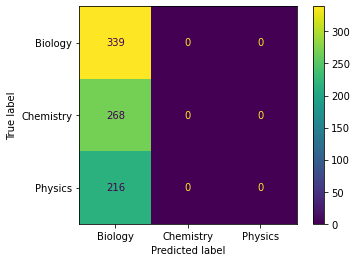

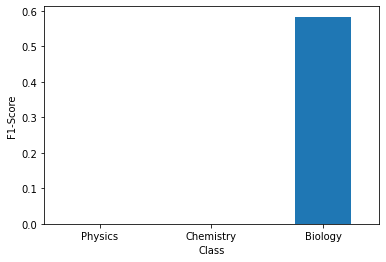

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(texts_train, labels_train)
labels_predicted = dummy_most_frequent.predict(texts_val)

confu_matrix = confusion_matrix(labels_val,labels_predicted)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()
print(confu_matrix)
def calculate_scores(confu_matrix, subject):
    if subject == 'biology':
        TP = confu_matrix[0,0]
        FP = confu_matrix[1,0]+confu_matrix[2,0]
        TN = confu_matrix[1,1]+confu_matrix[1,2]+confu_matrix[2,1]+confu_matrix[2,2]
        FN = confu_matrix[0,1]+confu_matrix[0,2]
      
    elif subject == 'chemistry':
        TP = confu_matrix[1,1]
        FP = confu_matrix[0,1]+confu_matrix[2,1]
        TN = confu_matrix[0,0]+confu_matrix[0,2]+confu_matrix[2,0]+confu_matrix[2,2]
        FN = confu_matrix[1,0]+confu_matrix[1,2]
       
    elif subject == 'physics':
        TP = confu_matrix[2,2]
        FP = confu_matrix[0,2]+confu_matrix[1,2]
        TN = confu_matrix[0,0]+confu_matrix[0,1]+confu_matrix[1,0]+confu_matrix[1,1]
        FN = confu_matrix[2,0]+confu_matrix[2,1]
     

    accuracy=(TP+TN)/(TP+FP+FN+TN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1=2*(precision*recall)/(precision+recall)
    return pd.Series({'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':F1}, name=subject.upper())

# create DataFrame
df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##Dummy Classifier with strategy="stratified"

[[136 115  88]
 [112  88  68]
 [110  64  42]]
               Accuracy Precision Recall F1-Score
Chemistry         0.564     0.330  0.328    0.329
Biology           0.484     0.380  0.401    0.390
Physics           0.599     0.212  0.194    0.203
macro averaged    0.549     0.307  0.308    0.307


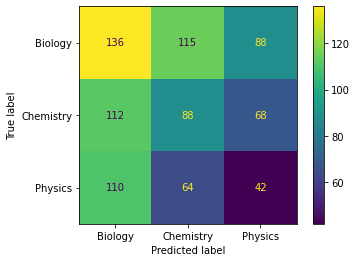

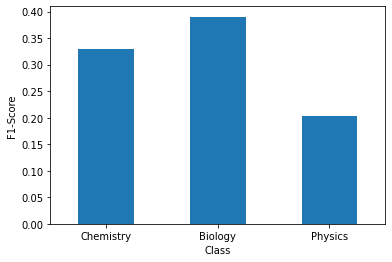

In [ ]:
dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(texts_train, labels_train)
labels_predicted = dummy_stratified.predict(texts_val)
confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##LogisticRegression with One-hot vectorization

[[338   0   1]
 [267   1   0]
 [212   1   3]]
               Accuracy Precision Recall F1-Score
Chemistry         0.674     0.500  0.004    0.007
Biology           0.417     0.414  0.997    0.585
Physics           0.740     0.750  0.014    0.027
macro averaged    0.610     0.555  0.338    0.206


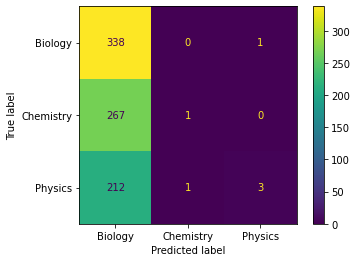

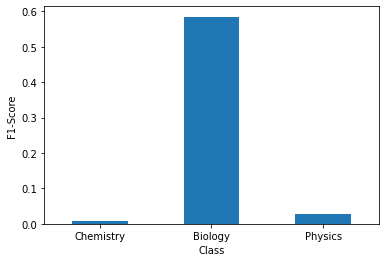

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

new_text_train=[[value] for value in texts_train]
new_text_label=[[value] for value in texts_val]
one_hotencoder = OneHotEncoder(handle_unknown='ignore')
one_hot_train=one_hotencoder.fit_transform(new_text_train)
one_hot_val=one_hotencoder.transform(new_text_label)

lr_cv = LogisticRegression()
lr_cv.fit(one_hot_train, labels_train)
labels_predicted = lr_cv.predict(one_hot_val)
# print(labels_val)
# print(labels_predicted)
confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()



##LogisticRegression with TF-IDF vectorization

[[281  47  11]
 [111 138  19]
 [ 67  37 112]]
               Accuracy Precision Recall F1-Score
Chemistry         0.740     0.622  0.515    0.563
Biology           0.713     0.612  0.829    0.704
Physics           0.837     0.789  0.519    0.626
macro averaged    0.763     0.674  0.621    0.631


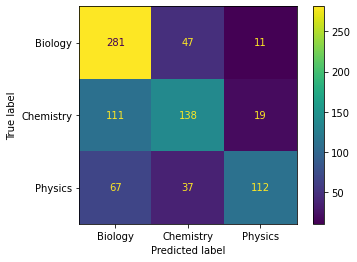

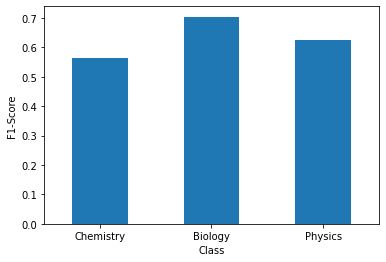

In [ ]:
# LogisticRegression with TF-IDF vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(texts_train)
X_val_tfidf = tfidf.transform(texts_val)

lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, labels_train)
labels_predicted = lr_tfidf.predict(X_val_tfidf)

confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##SVC Classifier with One-hot vectorization

[[338   0   1]
 [267   1   0]
 [212   1   3]]
               Accuracy Precision Recall F1-Score
Chemistry         0.674     0.500  0.004    0.007
Biology           0.417     0.414  0.997    0.585
Physics           0.740     0.750  0.014    0.027
macro averaged    0.610     0.555  0.338    0.206
{'Accuracy': 0.6103685702713649, 'Precision': 0.5545695634434925, 'Recall': 0.3382234598883654, 'F1-Score': 0.20648507372844163}


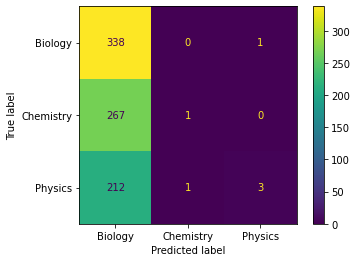

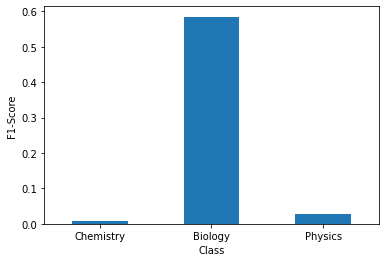

In [ ]:
# SVC Classifier with One-hot vectorization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


new_text_train=[[value] for value in texts_train]
new_text_label=[[value] for value in texts_val]
one_hotencoder = OneHotEncoder(handle_unknown='ignore')
one_hot_train=one_hotencoder.fit_transform(new_text_train)
one_hot_val=one_hotencoder.transform(new_text_label)

svm_clf = SVC(kernel='rbf')
svm_clf.fit(one_hot_train, labels_train)
labels_predicted = svm_clf.predict(one_hot_val)

confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))
row = df.loc['macro averaged', ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
dic=row.to_dict()
print(dic)
# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()




##Schoose own **classifier**


RandomForestClassifier

[[263  63  13]
 [143 115  10]
 [ 89  38  89]]
               Accuracy Precision Recall F1-Score
Physics           0.818     0.795  0.412    0.543
Chemistry         0.691     0.532  0.429    0.475
Biology           0.626     0.531  0.776    0.631
macro averaged    0.712     0.619  0.539    0.550


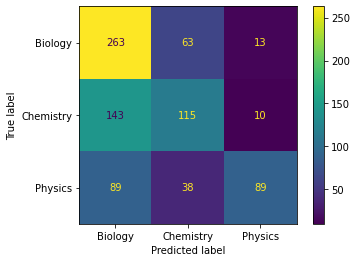

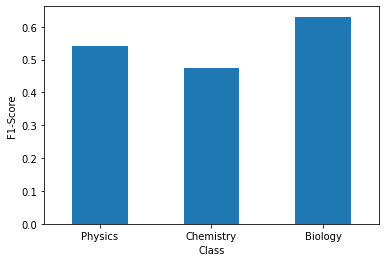

In [ ]:

from sklearn.ensemble import RandomForestClassifier

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,labels_train)

labels_predicted = clf.predict(X_val)

confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))
row = df.loc['macro averaged', ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
dic=row.to_dict()
# print(dic)
# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

# Question 4  Parameter Tuning
In this task you will improve the effectiveness of the LogisticRegression with TF-IDF vectorisation from Q3.
Parameter tuning - Tune the parameters for both the vectorizer and classifier on the validation set. [5 marks]
1. Classifier - Regularisation C value (typical values might be powers of 10 (from 10^-3 to 10^5)
2. Vectorizer - Parameters: sublinear_tf and max_features (vocabulary size) (in a range None to 50k)
3. Select another parameter of your choice from the classifier or vectorizer
Your search does not need to be exhaustive. Changing all parameters at once is expensive and slow (a full sweep is exponential in the number of parameters). 

Consider selecting the best parameters sequentially. The resulting tuned model should improve over the baseline TF-IDF model. Report the results in a table with the
accuracy, macro-averaged precision, recall, and F1 on the validation data. Discuss the parameters and values
you tried, what helped and what did not and explain why this may be the case.

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {'C': [10**i for i in range(-3, 6)],'sublinear_tf':[True,False],'max_features': [None,50,100,500,1000,5000,10000,50000],'solver':["newton-cg", "sag", "saga","lbfgs"]}
data_list=[]
max_f1_score = 0
best_params = {}
for params in ParameterGrid(param_grid):
    vectorizer = TfidfVectorizer(sublinear_tf=params['sublinear_tf'],max_features=params['max_features'])
    X_train = vectorizer.fit_transform(texts_train)
    X_val = vectorizer.transform(texts_val)
    
    clf = LogisticRegression(C=params['C'],solver=params['solver'])
    clf.fit(X_train,labels_train)
    
    labels_predicted = clf.predict(X_val)
    
    confu_matrix = confusion_matrix(labels_val,labels_predicted)
    df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
    for subject in df.index:
        scores = calculate_scores(confu_matrix, subject.lower())
        df.loc[subject] = scores
    df.loc['macro averaged'] = df.mean()
    df.applymap('{:.3f}'.format)

    row = df.loc['macro averaged', ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
    row_dict = row.to_dict()
    result_dict = {**params, **row_dict}
    data_list.append(result_dict)
  
    
    f1_score = result_dict['F1-Score']
    if f1_score > max_f1_score:
        max_f1_score = f1_score
        best_params = params.copy()


<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid value encountered in long_scalars
  precision=TP/(TP+FP)
<ipython-input-11-70a39dc85548>:37: RuntimeWarning: invalid valu

In [ ]:
df = pd.DataFrame(data_list, columns=['C', 'max_features', 'solver', 'sublinear_tf','Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
df.round(3)

C  max_features     solver  sublinear_tf  Accuracy  Precision  \
0         0.001           NaN  newton-cg          True     0.608      0.412   
1         0.001           NaN  newton-cg         False     0.608      0.412   
2         0.001           NaN        sag          True     0.608      0.412   
3         0.001           NaN        sag         False     0.608      0.412   
4         0.001           NaN       saga          True     0.608      0.412   
..          ...           ...        ...           ...       ...        ...   
571  100000.000       50000.0        sag         False     0.734      0.601   
572  100000.000       50000.0       saga          True     0.754      0.628   
573  100000.000       50000.0       saga         False     0.746      0.618   
574  100000.000       50000.0      lbfgs          True     0.747      0.614   
575  100000.000       50000.0      lbfgs         False     0.746      0.613   

     Recall  F1-Score  
0     0.333     0.583  
1     0.333     0.583  
2     0.333     0.583  
3     0.333     0.583  
4     0.333     0.583  
..      ...       ...  
571   0.595     0.597  
572   0.621     0.624  
573   0.611     0.614  
574   0.616     0.614  
575   0.612     0.613  

[576 rows x 8 columns]

In [ ]:
max_f1_score_row = df.loc[df['F1-Score'].idxmax()]
print("Row with highest F1-Score:")
print(max_f1_score_row)

Row with highest F1-Score:
C                    10.0
max_features       5000.0
solver          newton-cg
sublinear_tf        False
Accuracy         0.765087
Precision        0.649575
Recall           0.638444
F1-Score         0.642447
Name: 297, dtype: object


In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best f1_score:{max_f1_score=:.3f}")


Best parameters: {'C': 10, 'max_features': 5000, 'solver': 'newton-cg', 'sublinear_tf': False}
Best f1_score:max_f1_score=0.642


# Question 5 - Context vectors using BERT 
Now you will explore whether a deep learning-based approach can improve the performance compared to the earlier more traditional approaches. Note: This will be computationally expensive and time-consuming. You should use a GPU where possible for this, which can be enabled in Google Colab under “Change Runtime Type” and through providing an appropriate ‘device’ to HuggingFace.

1. Encode the text of your documents using the ‘feature-extraction’ pipeline from the HuggingFace library with the ‘roberta_base’ model. Use only the first context vector for each document (which should represent the start token). Pass the context vectors (without any other previous features) into a LogisticRegression classifier from scikit-learn and train using the training set. Report the evaluation metrics on the validation set. [3 marks]

2. Train an end-to-end classifier using the ‘trainer’ function from the HuggingFace library, again using the ‘roberta_base’ model. Use a learning rate = 1e-4, epochs = 1, batch_size = 16 and no weight decay. Report the evaluation metrics on the validation set. [3 marks]
3. Try different values for the model, learning_rate, epochs and batch_size. Normally, you would do some form of systematic search across these values, but due to computational costs, you should not do that. Pick three different sets of these hyperparameters and describe your motivation for these choices. Retrain the models from scratch on the training set and report the evaluation metrics on the validation set for those three settings in a table along with
the hyperparameter settings from (b). [3 marks]

4. Which performed best: the approach in part (a) using context vectors from the pipeline approach or using an end-to-end model in parts (b-c). How do these approaches differ? What is the likely reason for any performance difference? [3 marks]

##question 5 first question.
Encode the text of your documents using the ‘feature-extraction’ pipeline from the HuggingFace library with the ‘roberta_base’ model. Use only the first context vector for each document (which should represent the start token). Pass the context vectors (without any other previous features) into a LogisticRegression classifier from scikit-learn and train using the training set. Report the evaluation metrics on the validation set. [3 marks]

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from transformers import pipeline

pipe = pipeline('feature-extraction', model='roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch

In [ ]:
print(texts_train)

['I’m talking about rivers', "ok, so why couldn't they just measure it from 1m and divide it by 100?\\n\\nEssentially, is the time gradient discrete so you can't infer this?", "There's a good chance I'm misinterpreting your comment here, but are you saying that knowledge in machine learning would be beneficial for an astrophysicist?", '\\[...\\]**instead of** the characteristic onset of diamagnetic screening and **zero resistance** expected below the superconducting phase transition, **we observe the opposite effect**\\[...\\]\\n\\n  \\n\\n\\nFrom the abstract', 'Don’t listen to it! Crows are all liars', "It's a bracket fungus, you can see the pores. Possibly an underdeveloped fomitopsis pinicola or similar. Google 'young fomitopsis pinicola'", 'I mean heating and cooling should make it easier if used properly.', '[removed]', 'At this point I can never tell if QED is the logic one or Quantum Electrodynamics', 'It seems like any publication by CERN is a step closer', 'You want to stick 

In [ ]:

vectors=[]
for sentence in texts_train:
  context_vectors=pipe(sentence,return_tensors='pt',max_length=512,truncation=True)
  start_token_vector = context_vectors[0,0,:]
  vectors.append(start_token_vector)
train_tensor = torch.stack(vectors)

print(train_tensor.shape)
print(train_tensor)

vectors2=[]
for sentence in texts_val:
  context_vectors=pipe(sentence,return_tensors='pt',max_length=512,truncation=True)
  start_token_vector = context_vectors[0,0,:]
  vectors2.append(start_token_vector)
val_tensor = torch.stack(vectors2)

print(val_tensor.shape)
print(val_tensor)

torch.Size([2466, 768])
tensor([[-0.0483,  0.0780, -0.0261,  ..., -0.0944, -0.0528, -0.0546],
        [-0.0407,  0.0537, -0.0642,  ..., -0.1066, -0.0402, -0.0237],
        [-0.0431,  0.0809, -0.0417,  ..., -0.0617, -0.0194, -0.0599],
        ...,
        [-0.0493,  0.0648, -0.0354,  ..., -0.1030, -0.0289, -0.0494],
        [-0.0611,  0.0933, -0.0079,  ..., -0.0504, -0.0494, -0.0463],
        [-0.0687,  0.0904,  0.0169,  ..., -0.0796, -0.0322, -0.0002]])
torch.Size([823, 768])
tensor([[-0.0466,  0.0826, -0.0214,  ..., -0.0646, -0.0578, -0.0608],
        [-0.0489,  0.0944, -0.0427,  ..., -0.1239, -0.0097, -0.0500],
        [-0.0555,  0.0865,  0.0010,  ..., -0.0588, -0.0673, -0.0174],
        ...,
        [-0.0564,  0.0993, -0.0336,  ..., -0.0648, -0.0195, -0.0330],
        [-0.1056,  0.0889, -0.0231,  ..., -0.0403, -0.0531, -0.0168],
        [-0.0396,  0.0836, -0.0082,  ..., -0.0331, -0.0420, -0.0483]])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[267  57  15]
 [ 58 180  30]
 [ 37  40 139]]
               Accuracy Precision Recall F1-Score
Biology           0.797     0.738  0.788    0.762
Chemistry         0.775     0.650  0.672    0.661
Physics           0.852     0.755  0.644    0.695
macro averaged    0.808     0.714  0.701    0.706


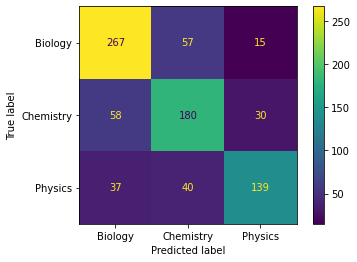

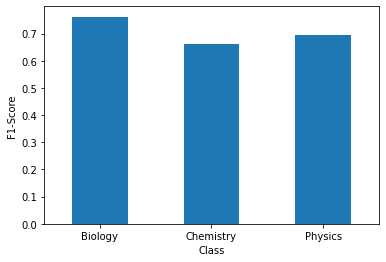

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(train_tensor,labels_train)
labels_predicted = clf.predict(val_tensor)
confu_matrix = confusion_matrix(labels_val,labels_predicted)
print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##Question 5 second question
Train an end-to-end classifier using the ‘trainer’ function from the HuggingFace library, again using the ‘roberta_base’ model. Use a learning rate = 1e-4, epochs = 1, batch_size = 16 and no weight decay. Report the evaluation metrics on the validation set. [3 marks]

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 1 # This is set low so that the training can happen quickly for this lab.
# model="roberta-base"

In [ ]:
from transformers import TrainingArguments, Trainer,DataCollatorForTokenClassification,AutoTokenizer,AutoModelForTokenClassification

training_args = TrainingArguments(
    output_dir="my-model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
 
)

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
train_dataset=[]
# 把label转成0，1，2
label_id=[]
for course in labels_train:
  if course == 'Biology':
    label_id.append([0])
  elif course == 'Chemistry':
    label_id.append([1])
  else:
    label_id.append([2])

train_data=zip(texts_train,label_id)


for text, label in train_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  train_dataset.append(data_dict)
print(train_dataset[0])

{'input_ids': [0, 100, 17, 27, 119, 1686, 59, 12323, 2], 'labels': [0]}


In [ ]:
print(labels_val)

['Physics', 'Biology', 'Physics', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Physics', 'Chemistry', 'Chemistry', 'Biology', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Physics', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Physics', 'Physics', 'Physics', 'Biology', 'Physics', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Physics', 'Chemistry', 'Biology', 'Biology', 'Physics', 'Chemistry', 'Physics', 'Biology', 'Biology', 'Physics', 'Biology', 'Chemistry', 'Physics', 'Biology', 'Chemistry', 'Biology', 'Physics', 'Physics', 'Chemistry', 'Biology', 'Biology', 'Physics', 'Chemistry', 'Chemistry', 'Chemistry', 'Biology', 'Biology', 'Chemistry', 'Biology', 'Biology', 'Physics', 'Physics', 'Physics', 'Chemistry', 'Chemistry', 'Chemistry', 'Biology', 'Biology', 'Biology', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Biology', 'Biology', 'Chemistry', 'Biology', 'Biology', 'C

In [ ]:
eval_dataset=[]

# 把label转成0，1，2
label_id_val=[]
for course in labels_val:
  if course == 'Biology':
    label_id_val.append([0])
  elif course == 'Chemistry':
    label_id_val.append([1])
  else:
    label_id_val.append([2])

val_data=zip(texts_val,label_id_val)

from datasets import Dataset
for text, label in val_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  eval_dataset.append(data_dict)

# eval_dataset = Dataset.from_dict(data_dict)
print(eval_dataset)  

[{'input_ids': [0, 7516, 15983, 38, 206, 38, 1346, 3392, 98, 203, 2], 'labels': [2]}, {'input_ids': [0, 15698, 5436, 44128, 282, 37457, 282, 100, 303, 42, 9740, 804, 35, 2223, 33816, 38703, 3087, 21343, 11574, 32, 55, 5693, 8, 12549, 37457, 282, 5652, 4900, 3087, 21343, 11574, 6, 51, 64, 45, 28, 341, 7, 2438, 17792, 50, 27040, 4, 37457, 282, 37457, 282, 2847, 10, 5436, 16, 761, 9, 101, 10, 6936, 53, 33997, 8, 9992, 116, 407, 24, 18, 357, 114, 24, 16, 10, 5436, 142, 24, 6670, 357, 650, 16710, 8, 10, 357, 12241, 77, 47, 304, 5, 97, 1907, 9, 3087, 21343, 11574, 116, 37457, 282, 37457, 282, 15698, 1711, 26, 6, 4420, 6, 5, 17379, 40, 800, 31, 5, 3741, 7198, 8, 2914, 5, 38144, 4, 37457, 282, 37457, 282, 6209, 14, 10, 4420, 7, 14, 5, 226, 4154, 10729, 40, 2559, 5, 3300, 268, 31, 5, 26656, 137, 33131, 137, 164, 88, 5, 1049, 1925, 1743, 683, 5, 3087, 21343, 6315, 34, 156, 106, 88, 10, 1123, 50, 3046, 8, 47, 26417, 1627, 116, 14, 18, 70, 38, 770, 7, 216, 4, 3047, 38, 216, 114, 5, 26656, 32, 3741

In [ ]:
label_list=[]
for dic in eval_dataset:
  label_list.append(dic["labels"])
print(len(label_list))

823


In [ ]:
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer,AutoModelForTokenClassification

ner_tag_to_id = {'Biology': 0, 'Chemistry': 1, 'Physics': 2}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
model = AutoModelForTokenClassification.from_pretrained("roberta-base", id2label=ner_id_to_tag)
trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=eval_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2466
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 155
  Number of trainable parameters = 124057347


***** Running Evaluation *****
  Num examples = 823
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=155, training_loss=0.8458809145035282, metrics={'train_runtime': 111.7488, 'train_samples_per_second': 22.067, 'train_steps_per_second': 1.387, 'total_flos': 292202843436468.0, 'train_loss': 0.8458809145035282, 'epoch': 1.0})

In [ ]:
predictions, label_ids, metrics = trainer.predict(eval_dataset)

***** Running Prediction *****
  Num examples = 823
  Batch size = 16


In [ ]:
metrics

{'test_loss': 0.6608393788337708,
 'test_runtime': 10.6686,
 'test_samples_per_second': 77.142,
 'test_steps_per_second': 4.874}

In [ ]:
predictions = np.argmax(predictions, axis =-1)


In [ ]:
print(predictions)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
predictions=predictions[:,0]


In [ ]:
print(predictions)

[0 0 2 0 2 0 2 1 2 1 1 2 0 1 0 0 2 0 1 2 0 1 2 1 0 1 1 2 2 2 0 2 1 0 1 0 1
 2 1 0 0 2 1 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 2 0 0 0 1 0 2 2 2 1 1 0 1
 0 0 2 0 1 0 0 0 1 0 0 1 2 2 1 0 1 0 1 0 0 2 0 1 1 0 1 0 1 2 1 0 2 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 1 0 1 0 0 0
 2 0 2 1 2 0 1 1 1 0 0 0 2 2 0 1 0 0 2 1 0 0 0 1 0 0 0 1 0 1 2 0 0 1 1 0 2
 0 0 2 2 0 2 1 0 1 0 0 0 2 0 2 1 0 0 0 0 0 2 0 2 0 2 0 2 2 1 0 1 1 0 0 1 2
 0 0 0 0 0 2 0 1 2 2 1 0 1 0 0 2 2 0 0 0 2 0 1 0 0 0 1 0 2 0 0 0 0 0 1 2 0
 0 0 1 0 1 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 0 1 2 0 0 2 1 1 0 2 0 0 2 1 0 0
 1 0 0 2 2 0 2 0 1 0 2 1 2 0 0 2 1 0 1 1 2 1 0 0 2 2 0 0 1 2 0 1 2 2 1 0 1
 1 0 0 0 0 1 1 0 0 2 1 0 2 0 2 2 1 0 0 1 1 0 2 0 1 0 0 0 1 2 2 1 0 2 1 0 0
 0 1 0 0 1 0 1 2 1 0 0 0 0 1 1 1 0 0 0 0 0 2 2 2 1 0 0 1 0 0 1 0 2 1 0 0 2
 1 0 0 2 0 0 0 2 0 1 0 2 1 0 0 1 0 0 1 0 2 0 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 2 0 0 1 2 2 1 2 0 0 0 0 2 2 0 1 0 0 1 2 0 1 2 0 0 0 2 1
 0 1 2 1 2 2 2 0 0 2 0 0 

In [ ]:
label_ids[:, 0]

array([2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2,

               Accuracy Precision Recall F1-Score
Physics           0.853     0.749  0.662    0.703
Chemistry         0.798     0.736  0.593    0.657
Biology           0.800     0.709  0.870    0.781
macro averaged    0.817     0.731  0.709    0.714


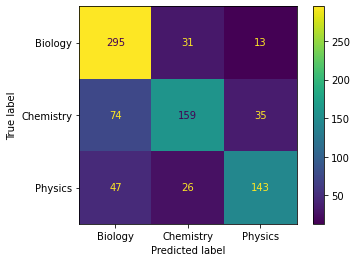

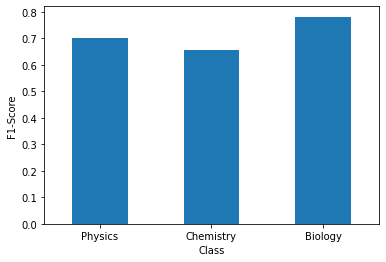

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix and classification report
confu_matrix = confusion_matrix(label_ids[:, 0],predictions)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()


df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

## question 3a

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 10 # This is set low so that the training can happen quickly for this lab.

from transformers import TrainingArguments, Trainer,DataCollatorForTokenClassification,AutoTokenizer,AutoModelForTokenClassification
from transformers import RobertaTokenizer, RobertaModel
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer,AutoModelForTokenClassification

training_args = TrainingArguments(
    output_dir="your-model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
 
)

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


train_dataset=[]
# 把label转成0，1，2
label_id=[]
for course in labels_train:
  if course == 'Biology':
    label_id.append([0])
  elif course == 'Chemistry':
    label_id.append([1])
  else:
    label_id.append([2])

train_data=zip(texts_train,label_id)
for text, label in train_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  train_dataset.append(data_dict)

eval_dataset=[]
# 把label转成0，1，2
label_id_val=[]
for course in labels_val:
  if course == 'Biology':
    label_id_val.append([0])
  elif course == 'Chemistry':
    label_id_val.append([1])
  else:
    label_id_val.append([2])

val_data=zip(texts_val,label_id_val)

from datasets import Dataset
for text, label in val_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  eval_dataset.append(data_dict)


ner_tag_to_id = {'Biology': 0, 'Chemistry': 1, 'Physics': 2}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
model = AutoModelForTokenClassification.from_pretrained("roberta-base", id2label=ner_id_to_tag)
trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=eval_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading file vocab.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/bc2764f8af2e92b6eb5679868df33e224075ca68/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/bc2764f8af2e92b6eb5679868df33e224075ca68/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/bc2764f8af2e92b6eb5679868df33e224075ca68/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectur

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2466
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1550
  Number of trainable parameters = 124057347


***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
Saving model checkpoint to your-model/checkpoint-500
Configuration saved in your-model/checkpoint-500/config.json
Model weights saved in your-model/checkpoint-500/pytorch_model.bin
tokenizer config file saved in your-model/checkpoint-500/tokenizer_config.json
Special tokens file saved in your-model/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
Saving model checkpoint to your-model/checkpoint-1000
Configuration saved in your-model/checkpoint-1000/config.json
Model weights saved in your-model/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in your-model/checkpoint-1000

TrainOutput(global_step=1550, training_loss=0.3743144006113852, metrics={'train_runtime': 1084.297, 'train_samples_per_second': 22.743, 'train_steps_per_second': 1.429, 'total_flos': 2880639062178480.0, 'train_loss': 0.3743144006113852, 'epoch': 10.0})

In [ ]:
predictions, label_ids, metrics = trainer.predict(eval_dataset)

***** Running Prediction *****
  Num examples = 823
  Batch size = 16


In [ ]:
predictions

array([[[  -1.62239  ,    2.3325229,   -2.469255 ],
        [  -1.8220361,    2.7396078,   -2.6624274],
        [  -1.6911721,    2.5355318,   -2.647993 ],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       [[   5.187949 ,   -1.9100952,   -3.6646464],
        [   5.192577 ,   -1.9050224,   -3.6641088],
        [   5.193769 ,   -1.9014709,   -3.6654575],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       [[  -2.2447345,   -3.1382918,    4.4728765],
        [  -2.2432451,   -3.137382 ,    4.4768963],
        [  -2.2435045,   -3.1375098,    4.4768863],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       ...,

      

In [ ]:
predictions_a = np.argmax(predictions, axis=-1)

In [ ]:
predictions_a

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
predictions_a=predictions_a[:,0]


In [ ]:
truelabel_a=label_ids[:, 0]
print(truelabel_a)

[2 0 2 1 2 0 1 1 2 0 1 2 1 1 0 0 1 0 1 2 0 1 2 1 1 1 1 2 2 2 0 2 1 0 1 0 1
 2 1 0 0 2 1 2 0 0 2 0 1 2 0 1 0 2 2 1 0 0 2 1 1 1 0 0 1 0 0 2 2 2 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 2 1 2 0 0 1 0 0 2 0 1 0 0 1 1 1 2 2 0 2 1 1 0 1
 0 2 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0
 2 0 2 1 2 1 1 1 1 0 0 2 1 2 0 1 1 0 2 1 0 2 0 1 0 0 0 1 1 1 2 0 0 2 1 0 2
 0 0 1 1 1 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 0 2 0 1 0 2 0 2 2 1 0 1 2 0 0 1 0
 1 0 2 0 0 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 1 1 2 0 0 0 0 0 1 2 0
 0 0 1 0 1 2 0 0 0 0 2 1 1 0 0 0 0 0 0 0 2 0 1 2 0 2 2 1 1 0 2 1 0 0 1 0 0
 2 2 0 2 2 0 2 0 1 1 2 1 1 0 0 0 1 0 1 1 2 1 0 0 1 2 0 0 1 2 0 2 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 0 1 0 2 0 2 2 1 0 0 1 1 2 2 0 1 1 0 0 2 2 2 1 0 2 1 1 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 2 1 1 0 0 2 1 0 2 1 1 2 1 0 0 2
 2 1 0 2 2 1 2 2 0 1 1 2 1 0 0 2 2 0 1 0 2 0 2 2 2 0 1 0 1 0 0 0 1 0 0 1 2
 0 1 0 2 1 1 1 1 2 2 0 0 1 2 2 1 1 0 1 0 0 2 2 0 0 2 0 1 2 2 1 2 1 0 1 1 1
 0 1 1 2 1 2 2 0 0 2 2 2 

               Accuracy Precision Recall F1-Score
Biology           0.820     0.785  0.776    0.780
Chemistry         0.795     0.664  0.746    0.703
Physics           0.855     0.759  0.657    0.705
macro averaged    0.823     0.736  0.726    0.729


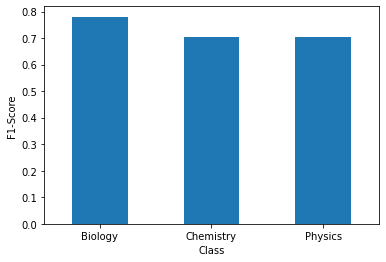

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix 
confu_matrix = confusion_matrix(truelabel_a, predictions_a)

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##question 3b

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 1 # This is set low so that the training can happen quickly for this lab.

from transformers import TrainingArguments, Trainer,DataCollatorForTokenClassification,AutoTokenizer,AutoModelForTokenClassification
from transformers import RobertaTokenizer, RobertaModel
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer,AutoModelForTokenClassification

training_args = TrainingArguments(
    output_dir="her-model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
 
)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")



train_dataset=[]
# 把label转成0，1，2
label_id=[]
for course in labels_train:
  if course == 'Biology':
    label_id.append([0])
  elif course == 'Chemistry':
    label_id.append([1])
  else:
    label_id.append([2])

train_data=zip(texts_train,label_id)
for text, label in train_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  train_dataset.append(data_dict)

eval_dataset=[]
# 把label转成0，1，2
label_id_val=[]
for course in labels_val:
  if course == 'Biology':
    label_id_val.append([0])
  elif course == 'Chemistry':
    label_id_val.append([1])
  else:
    label_id_val.append([2])

val_data=zip(texts_val,label_id_val)

from datasets import Dataset
for text, label in val_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  eval_dataset.append(data_dict)


ner_tag_to_id = {'Biology': 0, 'Chemistry': 1, 'Physics': 2}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", id2label=ner_id_to_tag)
trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=eval_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_ac

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_model.bin
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForS

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2466
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 155
  Number of trainable parameters = 108893955
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


***** Running Evaluation *****
  Num examples = 823
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=155, training_loss=0.7536376460905998, metrics={'train_runtime': 110.973, 'train_samples_per_second': 22.222, 'train_steps_per_second': 1.397, 'total_flos': 298246406265432.0, 'train_loss': 0.7536376460905998, 'epoch': 1.0})

In [ ]:
predictions, label_ids, metrics = trainer.predict(eval_dataset)

***** Running Prediction *****
  Num examples = 823
  Batch size = 16


In [ ]:
predictions_b= np.argmax(predictions, axis=-1)

In [ ]:
predictions_b=predictions_b[:,0]

In [ ]:
predictions_b

array([1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2,
       1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2,

In [ ]:
truelabel_b=label_ids[:, 0]
print(truelabel_b)

[2 0 2 1 2 0 1 1 2 0 1 2 1 1 0 0 1 0 1 2 0 1 2 1 1 1 1 2 2 2 0 2 1 0 1 0 1
 2 1 0 0 2 1 2 0 0 2 0 1 2 0 1 0 2 2 1 0 0 2 1 1 1 0 0 1 0 0 2 2 2 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 2 1 2 0 0 1 0 0 2 0 1 0 0 1 1 1 2 2 0 2 1 1 0 1
 0 2 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0
 2 0 2 1 2 1 1 1 1 0 0 2 1 2 0 1 1 0 2 1 0 2 0 1 0 0 0 1 1 1 2 0 0 2 1 0 2
 0 0 1 1 1 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 0 2 0 1 0 2 0 2 2 1 0 1 2 0 0 1 0
 1 0 2 0 0 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 1 1 2 0 0 0 0 0 1 2 0
 0 0 1 0 1 2 0 0 0 0 2 1 1 0 0 0 0 0 0 0 2 0 1 2 0 2 2 1 1 0 2 1 0 0 1 0 0
 2 2 0 2 2 0 2 0 1 1 2 1 1 0 0 0 1 0 1 1 2 1 0 0 1 2 0 0 1 2 0 2 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 0 1 0 2 0 2 2 1 0 0 1 1 2 2 0 1 1 0 0 2 2 2 1 0 2 1 1 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 2 1 1 0 0 2 1 0 2 1 1 2 1 0 0 2
 2 1 0 2 2 1 2 2 0 1 1 2 1 0 0 2 2 0 1 0 2 0 2 2 2 0 1 0 1 0 0 0 1 0 0 1 2
 0 1 0 2 1 1 1 1 2 2 0 0 1 2 2 1 1 0 1 0 0 2 2 0 0 2 0 1 2 2 1 2 1 0 1 1 1
 0 1 1 2 1 2 2 0 0 2 2 2 

               Accuracy Precision Recall F1-Score
Biology           0.790     0.697  0.867    0.773
Chemistry         0.796     0.703  0.646    0.673
Physics           0.875     0.865  0.620    0.722
macro averaged    0.820     0.755  0.711    0.723


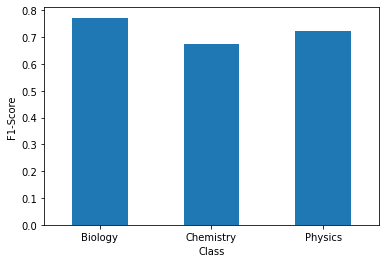

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix 
confu_matrix = confusion_matrix(truelabel_b, predictions_b)

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

##question 3c

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 40 # This is set low so that the training can happen quickly for this lab.

from transformers import TrainingArguments, Trainer,DataCollatorForTokenClassification,AutoTokenizer,AutoModelForTokenClassification
from transformers import RobertaTokenizer, RobertaModel
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer,AutoModelForTokenClassification

training_args = TrainingArguments(
    output_dir="his-model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
 
)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


train_dataset=[]
# 把label转成0，1，2
label_id=[]
for course in labels_train:
  if course == 'Biology':
    label_id.append([0])
  elif course == 'Chemistry':
    label_id.append([1])
  else:
    label_id.append([2])

train_data=zip(texts_train,label_id)
for text, label in train_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  train_dataset.append(data_dict)

eval_dataset=[]
# 把label转成0，1，2
label_id_val=[]
for course in labels_val:
  if course == 'Biology':
    label_id_val.append([0])
  elif course == 'Chemistry':
    label_id_val.append([1])
  else:
    label_id_val.append([2])

val_data=zip(texts_val,label_id_val)

from datasets import Dataset
for text, label in val_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  eval_dataset.append(data_dict)


ner_tag_to_id = {'Biology': 0, 'Chemistry': 1, 'Physics': 2}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", id2label=ner_id_to_tag)
trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=eval_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2466
  Num Epochs = 40
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 6200
  Number of trainable parameters = 108893955
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16


KeyboardInterrupt: ignored

In [ ]:
predictions, label_ids, metrics = trainer.predict(eval_dataset)

***** Running Prediction *****
  Num examples = 823
  Batch size = 16


In [ ]:
predictions = np.argmax(predictions, axis=-1)

In [ ]:
predictions=predictions[:,0]

In [ ]:
truelabel=label_ids[:, 0]
print(truelabel)

[2 0 2 1 2 0 1 1 2 0 1 2 1 1 0 0 1 0 1 2 0 1 2 1 1 1 1 2 2 2 0 2 1 0 1 0 1
 2 1 0 0 2 1 2 0 0 2 0 1 2 0 1 0 2 2 1 0 0 2 1 1 1 0 0 1 0 0 2 2 2 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 2 1 2 0 0 1 0 0 2 0 1 0 0 1 1 1 2 2 0 2 1 1 0 1
 0 2 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0
 2 0 2 1 2 1 1 1 1 0 0 2 1 2 0 1 1 0 2 1 0 2 0 1 0 0 0 1 1 1 2 0 0 2 1 0 2
 0 0 1 1 1 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 0 2 0 1 0 2 0 2 2 1 0 1 2 0 0 1 0
 1 0 2 0 0 1 0 1 2 0 1 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 1 1 2 0 0 0 0 0 1 2 0
 0 0 1 0 1 2 0 0 0 0 2 1 1 0 0 0 0 0 0 0 2 0 1 2 0 2 2 1 1 0 2 1 0 0 1 0 0
 2 2 0 2 2 0 2 0 1 1 2 1 1 0 0 0 1 0 1 1 2 1 0 0 1 2 0 0 1 2 0 2 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 0 1 0 2 0 2 2 1 0 0 1 1 2 2 0 1 1 0 0 2 2 2 1 0 2 1 1 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 2 1 1 0 0 2 1 0 2 1 1 2 1 0 0 2
 2 1 0 2 2 1 2 2 0 1 1 2 1 0 0 2 2 0 1 0 2 0 2 2 2 0 1 0 1 0 0 0 1 0 0 1 2
 0 1 0 2 1 1 1 1 2 2 0 0 1 2 2 1 1 0 1 0 0 2 2 0 0 2 0 1 2 2 1 2 1 0 1 1 1
 0 1 1 2 1 2 2 0 0 2 2 2 

               Accuracy Precision Recall F1-Score
Biology           0.831     0.807  0.776    0.791
Chemistry         0.809     0.698  0.731    0.714
Physics           0.859     0.731  0.731    0.731
macro averaged    0.833     0.745  0.746    0.745


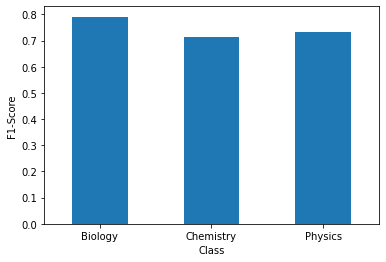

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix 
confu_matrix = confusion_matrix(truelabel, predictions)

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()

#Question 6 Conclusions and Future Work

In [ ]:
learning_rate = 1e-4
batch_size = 16
epochs = 40 # This is set low so that the training can happen quickly for this lab.

from transformers import TrainingArguments, Trainer,DataCollatorForTokenClassification,AutoTokenizer,AutoModelForTokenClassification
from transformers import RobertaTokenizer, RobertaModel
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer,AutoModelForTokenClassification

training_args = TrainingArguments(
    output_dir="beautiful-model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
 
)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


train_dataset=[]
# 把label转成0，1，2
label_id=[]
for course in labels_train:
  if course == 'Biology':
    label_id.append([0])
  elif course == 'Chemistry':
    label_id.append([1])
  else:
    label_id.append([2])

train_data=zip(texts_train,label_id)
for text, label in train_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  train_dataset.append(data_dict)

test_dataset=[]
# 把label转成0，1，2
label_id_test=[]
for course in labels_test:
  if course == 'Biology':
    label_id_test.append([0])
  elif course == 'Chemistry':
    label_id_test.append([1])
  else:
    label_id_test.append([2])

test_data=zip(texts_test,label_id_test)

from datasets import Dataset
for text, label in test_data:
  input_id=tokenizer.encode(text,max_length=512,truncation=True)
  data_dict = {"input_ids": input_id, "labels": label}
  test_dataset.append(data_dict)


ner_tag_to_id = {'Biology': 0, 'Chemistry': 1, 'Physics': 2}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", id2label=ner_id_to_tag)
trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=test_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embeddi

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2466
  Num Epochs = 40
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 6200
  Number of trainable parameters = 108893955
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
Saving model checkpoint to beautiful-model/checkpoint-500
Configuration saved in beautiful-model/checkpoint-500/config.json
Model weights saved in beautiful-model/checkpoint-500/pytorch_model.bin
tokenizer config file saved in beautiful-model/checkpoint-500/tokenizer_config.json
Special tokens file saved in beautiful-model/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
***** Running Evaluation *****
  Num examples = 823
  Batch size = 16
Saving model checkpoint to beautiful-model/checkpoint-1000
Configuration saved in beautiful-model/checkpoint-1000/config.json
Model weights saved in beautiful-model/checkpoint-1000/pytorch_model.bin
tokenizer config 

TrainOutput(global_step=6200, training_loss=0.08346162503765475, metrics={'train_runtime': 4628.8778, 'train_samples_per_second': 21.31, 'train_steps_per_second': 1.339, 'total_flos': 1.1850463167096708e+16, 'train_loss': 0.08346162503765475, 'epoch': 40.0})

In [ ]:
predictions, label_ids, metrics = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 823
  Batch size = 16


In [ ]:
predictions

array([[[  -3.5334854,   -3.2966328,    7.0348396],
        [  -3.6853848,   -2.9375553,    7.026413 ],
        [  -3.6538312,   -2.999448 ,    7.031323 ],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       [[  -3.139748 ,    7.414524 ,   -3.2290754],
        [  -3.1482558,    7.405604 ,   -3.2252622],
        [  -3.1489391,    7.4058375,   -3.225819 ],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       [[  -3.1460197,    7.418288 ,   -3.2217662],
        [  -3.148651 ,    7.414923 ,   -3.2201   ],
        [  -3.1474648,    7.415265 ,   -3.221134 ],
        ...,
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ],
        [-100.       , -100.       , -100.       ]],

       ...,

      

In [ ]:
predictions = np.argmax(predictions, axis=-1)

In [ ]:
predictions=predictions[:,0]

In [ ]:
predictions

array([2, 1, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0,
       1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
truelabel=label_ids[:, 0]
print(truelabel)

[2 1 1 1 2 2 2 2 1 1 2 0 1 2 2 2 0 2 2 1 1 2 1 1 0 2 2 1 1 1 1 1 1 2 1 2 0
 2 0 0 0 2 1 2 0 2 0 1 0 2 1 2 0 0 0 2 2 0 1 2 1 0 0 0 1 1 2 2 1 0 2 0 1 1
 0 2 0 1 1 1 1 2 1 0 0 1 0 0 0 1 1 0 1 2 2 2 0 0 0 1 2 2 1 1 0 0 1 0 2 1 2
 0 2 1 2 2 0 2 0 2 1 1 0 1 0 1 0 1 0 1 2 2 1 0 0 2 1 0 0 0 0 2 0 0 1 0 1 1
 1 2 1 0 2 1 0 1 2 1 1 2 1 1 2 0 2 2 0 2 0 1 0 0 1 0 1 0 1 1 2 0 2 2 2 0 0
 1 0 1 2 2 0 0 2 0 2 0 1 0 1 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 2 1 2 0 1 2 2 0
 0 0 0 2 0 1 2 2 1 0 2 2 0 0 2 0 1 0 0 0 1 0 2 0 1 1 2 2 0 2 2 0 0 1 0 1 2
 1 0 1 1 1 1 2 0 0 2 1 1 0 1 0 0 0 1 2 1 2 0 0 1 2 2 1 1 1 2 0 0 1 2 1 0 0
 1 1 1 0 0 0 1 2 0 2 1 0 1 0 0 1 0 1 1 0 2 0 1 1 0 2 0 0 2 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 2 2 1 0 0 2 0 0 1 0 1 2 0 2 0 0 0 0 2 0 0 2 0 1 1 1 0 1
 1 1 2 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 1 1 2 0 1 0 1 0 2 2 2 0 0 0 2 0 0 1 1
 2 0 0 0 1 1 0 1 0 0 2 1 0 0 1 0 0 1 2 0 0 0 2 0 2 1 1 1 2 0 2 0 0 0 0 2 0
 0 2 0 1 0 0 0 0 0 0 1 1 0 1 1 2 1 2 1 2 2 2 2 2 0 0 0 0 1 2 1 2 1 0 2 0 0
 0 2 0 0 0 1 1 1 0 2 0 1 

[[260  48  23]
 [ 63 173  41]
 [ 35  24 156]]
               Accuracy Precision Recall F1-Score
Chemistry         0.786     0.706  0.625    0.663
Biology           0.795     0.726  0.785    0.755
Physics           0.851     0.709  0.726    0.717
macro averaged    0.810     0.714  0.712    0.712


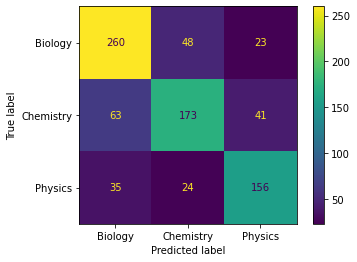

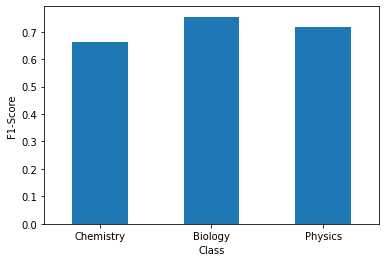

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix 
confu_matrix = confusion_matrix(truelabel, predictions)

print(confu_matrix)
ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Biology','Chemistry','Physics']).plot()

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=[subject for subject in set(Counter(labels))])
for subject in df.index:
    scores = calculate_scores(confu_matrix, subject.lower())
    df.loc[subject] = scores
df.loc['macro averaged'] = df.mean()
print(df.applymap('{:.3f}'.format))

# plot
df_f1 = df.loc[[subject for subject in set(Counter(labels))], ['F1-Score']]
ax = df_f1.plot(kind='bar', legend=False)
ax.set_xticklabels(df_f1.index, rotation=0)
ax.set_ylabel('F1-Score')
ax.set_xlabel('Class')
plt.show()